Project ini bertujuan untuk melakukan analisis penjualan produk seblak dari informasi produk serupa yang ada di website e-commerce Tokopedia sebagai pertimbangan pengambilan keputusan.


# Case
Saya ingin meningkatkan pendapatan dengan berjualan di Tokopedia, namun terdapat keterbatasan modal. Oleh karena itu, Saya memilih skema dropship dan fokus pada promosi. Mengingat tren viral seblak, Saya ingin menganalisis minat dan pembelian masyarakat terhadap produk seblak.

Saya menggunakan data produk seblak di Tokopedia yang kemudian akan dilakukan proses analisis untuk mendapatkan insight apakah penjualan produk seblak memiliki prospek yang bagus kedepannya.

## Web Scraping
Pada tahap ini dilakukan pengambilan data produk seblak dari website Tokopedia. Data yang diambil berupa 'nama produk', 'harga produk', 'penjual', 'kota toko', 'banyaknya terjual', dan 'rating toko'. Pengambilan data dilakukan pada 10 halaman website tersebut.

In [235]:
# import seluruh module yang dibutuhkan
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time


Proses scraping data menggunakan Selenium dan BeautifulSoup


In [236]:
# Inisialisasi driver Chrome
driver = webdriver.Chrome()
# Jumlah halaman yang akan di-scrape
pages = 10

# list untuk menyimpan sementara hasil scraping masing-masing data
result_nama_produk = []
result_harga_produk = []
result_penjual = []
result_kota_toko = []
result_banyaknya_terjual = []
result_rating_produk = []

# Iterasi untuk mengambil data dari masing-masing halaman website
for page in range(1,pages+1):
    # Membuat URL berdasarkan nomor halaman
    link_url = f'https://www.tokopedia.com/search?navsource=&page={page}&q=seblak&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st='
    driver.get(link_url)
    
    # Iterasi untuk melakukan automatis scroll pada halaman website
    for i in range(8):
        start = i * 1080
        add = 1080
        driver.execute_script(f"window.scrollTo({add}, {start});")
        time.sleep(5)
        
    # Mendapatkan HTML halaman dan parsing dengan BeautifulSoup
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    # Mencari elemen-elemen produk pada halaman
    contents = soup.find_all('div', attrs={'class':'css-llwpbs'})
    
    # Iterasi untuk mengambil informasi produk dari setiap elemen
    for content in contents:
        # Mengambil nama produk
        nama_produk = content.find('div', {'class':'prd_link-product-name css-3um8ox','data-testid':'spnSRPProdName'})
        if nama_produk is None:
            result_nama_produk.append(np.nan)
        else:
            result_nama_produk.append(nama_produk.getText())
        
        # Mengambil harga produk  
        harga_produk = content.find('div', {'class':'prd_link-product-price css-h66vau','data-testid':'spnSRPProdPrice'})
        if harga_produk is None:
            result_harga_produk.append(np.nan)
        else:
            result_harga_produk.append(harga_produk.getText())
        
        # Mengambil nama penjual   
        penjual = content.find('span', {'class': 'prd_link-shop-name css-1kdc32b flip'})
        if penjual is None:
            result_penjual.append(np.nan)
        else:
            result_penjual.append(penjual.getText())
        
        # Mengambil kota toko 
        kota_toko = content.find('span', {'class':'prd_link-shop-loc css-1kdc32b flip', 'data-testid':'spnSRPProdTabShopLoc'})
        if kota_toko is None:
            result_kota_toko.append(np.nan)
        else:
            result_kota_toko.append(kota_toko.getText())
        
        # Mengambil banyaknya produk terjual   
        banyaknya_terjual = content.find('span', {'class': 'prd_label-integrity css-1sgek4h'})
        if banyaknya_terjual is None:
            result_banyaknya_terjual.append(np.nan)
        else:
            result_banyaknya_terjual.append(banyaknya_terjual.getText())
        
        # Mengambil rating produk   
        rating_produk = content.find('span', {'class': 'prd_rating-average-text css-t70v7i'})
        if rating_produk is None:
            result_rating_produk.append(np.nan)
        else:
            result_rating_produk.append(rating_produk.getText())

# membuat dataframe dari gabungan list
df = pd.DataFrame()

df['nama_produk'] = result_nama_produk
df['harga_produk'] = result_harga_produk
df['penjual'] = result_penjual
df['kota_toko'] = result_kota_toko
df['banyaknya_terjual'] = result_banyaknya_terjual
df['rating_produk'] = result_rating_produk

df


,nama_produk,harga_produk,penjual,kota_toko,banyaknya_terjual,rating_produk
0,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,Rp24.000,Lidigeli,Kab. Garut,70+ terjual,5.0
1,"Seblak Rafael, Seblak Coet Instan Halal",Rp25.000,Brother Meat Shop,Depok,250+ terjual,4.9
2,Kerupuk Seblak Pedas Krupuk Pelangi Pedas Sebl...,Rp15.500,toko bemo,Jakarta Timur,500+ terjual,4.9
3,kerupuk seblak 1kg,Rp11.500,zyvasnack,Kab. Purworejo,4 terjual,NaN
4,(250 GR) KERUPUK SEBLAK MENTAH / KERUPUK BAWANG,Rp8.500,Rejeki Makmur Jaya.,Kab. Bantul,NaN,NaN
...,...,...,...,...,...,...
838,Sebring (Seblak Kering) Original,Rp19.900,DapurIbuKita,Jakarta Barat,NaN,NaN
839,seblak kencur / okesnack,Rp10.000,oke snack,Jakarta Selatan,750+ terjual,4.9
840,Siomay Kerikil Kuncup / Siomay Mini / SIomay S...,Rp8.000,Aeeshastore,Bandung,100+ terjual,4.6
841,Kylafood Seblak karuhun,Rp12.825,kylafood,Bandung,4rb+ terjual,4.8


## Data Preparation
Pada tahap ini dilakukan pembersihan, mengatur, dan menformat data agar data sesuai dan mudah dianalisis

### Eksplorasi Data

In [237]:
# Membuat salinan DataFrame 'df' dan menyimpannya dalam variabel 'data'
data = df.copy()

# Menampilkan lima baris pertama dari DataFrame 'data' untuk melihat contoh data
data.head()

,nama_produk,harga_produk,penjual,kota_toko,banyaknya_terjual,rating_produk
0,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,Rp24.000,Lidigeli,Kab. Garut,70+ terjual,5.0
1,"Seblak Rafael, Seblak Coet Instan Halal",Rp25.000,Brother Meat Shop,Depok,250+ terjual,4.9
2,Kerupuk Seblak Pedas Krupuk Pelangi Pedas Sebl...,Rp15.500,toko bemo,Jakarta Timur,500+ terjual,4.9
3,kerupuk seblak 1kg,Rp11.500,zyvasnack,Kab. Purworejo,4 terjual,NaN
4,(250 GR) KERUPUK SEBLAK MENTAH / KERUPUK BAWANG,Rp8.500,Rejeki Makmur Jaya.,Kab. Bantul,NaN,NaN


Dataset berisi 6 kolom, dimana kolom 'nama_produk', 'penjual', dan 'kota_toko' dapat dilakukan analisis sebagai data bertipe kategorik dan kolom 'harga_produk', 'banyaknya_terjual', dan 'rating_produk' dapat dilakukan analisis sebagai data bertipe numerik. 

In [238]:
# Menampilkan informasi tentang DataFrame 'data'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nama_produk        843 non-null    object
 1   harga_produk       843 non-null    object
 2   penjual            843 non-null    object
 3   kota_toko          843 non-null    object
 4   banyaknya_terjual  779 non-null    object
 5   rating_produk      760 non-null    object
dtypes: object(6)
memory usage: 39.6+ KB


Terlihat bahwa semua kolom bertipe data object, sehingga pada tahap data cleaning akan dilakukan pengubahan tipe data, untuk data bertipe kategorik tetap menjadi object dan untuk data bertipe numerik akan diubah menjadi integer atau float.

In [239]:
# Menampilkan jumlah nilai null di setiap kolom DataFrame
data.isnull().sum()

nama_produk           0
harga_produk          0
penjual               0
kota_toko             0
banyaknya_terjual    64
rating_produk        83
dtype: int64

Terlihat bahwa kolom 'penjual', 'kota_toko', 'banyaknya_terjual', dan 'rating_produk' terdapat nilai null yang jumlahnya berbeda-beda. Sehingga pada tahap data cleaning dapat dilakukan perubahan nilai null yang sesuaikan dengan tipe data kolomnya.

### Data Cleaning

In [240]:
# Dictionary yang mengelompokan tipe data kolom (integer atau float)
num_col = {'integer':['harga_produk', 'banyaknya_terjual'], 'float':['rating_produk']}

# Iterasi berdasarkan tipe data dalam num_col (integer atau float)
for type in num_col.keys():
    # Pengecekan tipe data, apakah integer atau float
    if type == 'integer':
        # Iterasi untuk setiap kolom dengan tipe data integer
        for col in num_col[type]:
            # Menghilangkan karakter 'Rp', '.', '+', ' terjual', dan mengganti 'rb' dengan '000'
            data[col] = data[col].str.replace('Rp', '')
            data[col] = data[col].str.replace('.', '')
            data[col] = data[col].str.replace('Rp', '')
            data[col] = data[col].str.replace('+', '')
            data[col] = data[col].str.replace(' terjual', '')
            data[col] = data[col].str.replace('rb', '000')
            # Mengganti nilai NaN dengan '0'
            data[col] = data[col].fillna('0')
            # Mengubah tipe data menjadi int64
            data[col] = data[col].astype('int64')
    else:
        # Iterasi untuk setiap kolom dengan tipe data float
        for col in num_col[type]:
            # Mengganti nilai NaN dengan '0'
            data[col] = data[col].fillna('0')
            # Mengubah tipe data menjadi float
            data[col] = data[col].astype('float')
# Menghapus baris yang memiliki nilai NaN
data.dropna(inplace=True)
# Menampilkan lima baris pertama dari DataFrame hasil transformasi
data.head()

,nama_produk,harga_produk,penjual,kota_toko,banyaknya_terjual,rating_produk
0,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,24000,Lidigeli,Kab. Garut,70,5.0
1,"Seblak Rafael, Seblak Coet Instan Halal",25000,Brother Meat Shop,Depok,250,4.9
2,Kerupuk Seblak Pedas Krupuk Pelangi Pedas Sebl...,15500,toko bemo,Jakarta Timur,500,4.9
3,kerupuk seblak 1kg,11500,zyvasnack,Kab. Purworejo,4,0.0
4,(250 GR) KERUPUK SEBLAK MENTAH / KERUPUK BAWANG,8500,Rejeki Makmur Jaya.,Kab. Bantul,0,0.0


## Business Understanding/Problem Statement
Tahap ini bertujuan untuk mendapatkan pemahaman tentang bisnis, kebutuhan, tujuan, metriknya.

### Defining Problem Statement
1. Specific : Melakukan analisis untuk mengetahui prospek penjualan produk seblak dengan melihat tingkat customer loyalty
2. Measurable : Tingkat kepuasan konsumen terhadap produk lebih dari 4.7
3. Achievable : Mengetahui harga produk yang sesuai yang menarik minat konsumen
4. Relevant : Meningkatnya customer loyalty akan meningkatkan keuntungan penjualan
5. Time-bound : Proses analisis dilakukan selama sebulan menggunakan data yang diambil per hari

<b>Menganalisis prospek penjualan produk seblak dengan mengevaluasi tingkat customer loyalty dengan melihat tingkat kepuasan konsumen terhadap produk dengan fokus pada harga produk yang menarik minat konsumen dan memperoleh keuntungan yang lebih tinggi</b>

## Analysis

### Central Tendency

Lakukan analisis central tendecy dan kenormalan data dari kolom harga, banyak produk terjual, dan rating untuk memperoleh insight. 

In [241]:
# Menghitung mean (rata-rata), median, modus, standard deviation, dan kurtosis
mean = pd.Series(data[['harga_produk','banyaknya_terjual','rating_produk']].mean(), name='Mean')
median = pd.Series(data[['harga_produk','banyaknya_terjual','rating_produk']].median(), name='Median')
modus = pd.Series(data[['harga_produk','banyaknya_terjual','rating_produk']].mode().loc[0], name='Modus')
std = pd.Series(data[['harga_produk','banyaknya_terjual','rating_produk']].std(), name='Standard Deviation')
kurtosis = pd.Series(data[['harga_produk','banyaknya_terjual','rating_produk']].kurt(), name='Kurtosis')

# Menggabungkan hasil perhitungan menjadi satu DataFrame
summary= pd.concat([mean, median, modus, std, kurtosis], axis=1)
summary

,Mean,Median,Modus,Standard Deviation,Kurtosis
harga_produk,27593.106762,15000.0,15000.0,152475.368237,797.740972
banyaknya_terjual,362.550415,80.0,100.0,1090.247619,48.051263
rating_produk,4.392171,4.9,5.0,1.460789,5.119503


- Dari analisis data 'harga_produk', terlihat bahwa nilai rata-ratanya (mean) adalah 27593.106762 (Rp. 27.593,10), jauh lebih tinggi dibandingkan dengan nilai median sebesar 15000.00 (Rp. 15.000,00). Selain itu, terlihat bahwa modusnya adalah 15000.00 (Rp. 15.000,00), yang berarti lebih kecil daripada mean dan sama dengan median. Perbedaan ini menunjukkan adanya kecenderungan data yang condong ke kiri atau memiliki positive skewness.Terlihat juga nilai standard deviation yang cukup besar yakni 152475.368237 dan nilai kurtosis sebesar 797.740972 yang menandakan bahwa sebaran data bertipe leptokurtic
- Dari analisis data 'banyaknya_terjual', terlihat bahwa nilai rata-ratanya (mean) adalah 362.550415, jauh lebih tinggi dibandingkan dengan nilai median sebesar 80.0. Selain itu, terlihat bahwa modusnya adalah 100.0, yang berarti lebih kecil daripada mean namun lebih besar dari median. Perbedaan ini menunjukkan adanya kecenderungan data yang condong ke kiri atau memiliki positive skewness. rata-rata ke arah yang lebih besar. Terlihat juga nilai standard deviation yakni 1090.247619 dan nilai kurtosis sebesar 48.051263 yang menandakan bahwa sebaran data bertipe leptokurtic
- Dari analisis data 'rating_produk', terlihat bahwa nilai rata-ratanya (mean) adalah 4.392171, dimana nilai tersebut lebih rendah dibandingkan dengan nilai median sebesar 4.9. Selain itu, terlihat bahwa modusnya adalah 5.0, yang berarti lebih besar daripada mean dan median. Perbedaan ini menunjukkan adanya kecenderungan data yang condong ke kanan atau memiliki negative skewness. Terlihat juga nilai standard deviation yakni 1.460789 dan nilai kurtosis sebesar 5.119503 yang menandakan bahwa sebaran data bertipe leptokurtic

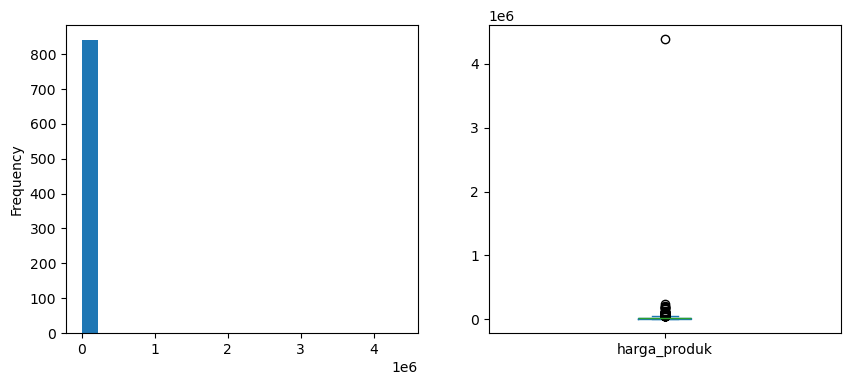

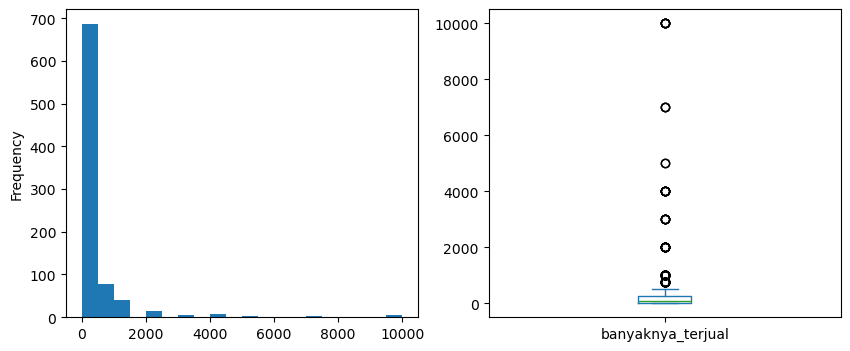

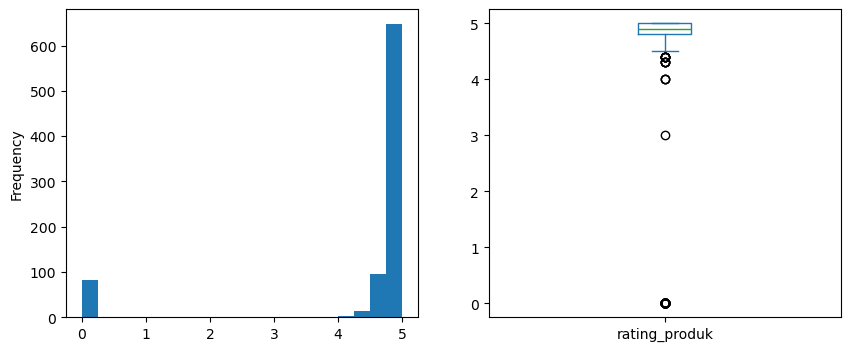

In [242]:
# Plot sebaran data 'harga_produk'
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
data['harga_produk'].plot(kind='hist', bins=20, ax=ax[0])
data['harga_produk'].plot(kind='box', ax=ax[1])
plt.show()

# Plot sebaran data 'banyaknya_terjual'
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
data['banyaknya_terjual'].plot(kind='hist', bins=20, ax=ax[0])
data['banyaknya_terjual'].plot(kind='box', ax=ax[1])
plt.show()

# Plot sebaran data 'rating_produk'
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
data['rating_produk'].plot(kind='hist', bins=20, ax=ax[0])
data['rating_produk'].plot(kind='box', ax=ax[1])
plt.show()

pada hasil plot terlihat bahwa di ketiga kolom memiliki outlier dan untuk kolom 'harga_produk' dan 'banyaknya_terjual' memiliki sebaran data yang sama yakni positive skew sedangkan kolom 'rating_produk' memiliki sebaran data negative skew

### Confidence Interval

Hitung potensi pendapatan maksimum dan minimum, jika data dianggap terdistribusi normal dan informasi produk terjual merupakan penjualan produk perbulan dengan confidence level 95%

In [244]:
# Menghitung standar deviasi dari 'harga_produk'
data['pendapatan'] =  data['harga_produk'] * data['banyaknya_terjual']
std = data['pendapatan'].std()

# Menghitung jumlah data
n = len(data)

# Menggunakan distribusi normal untuk menghitung interval kepercayaan 95%
low, up = stats.norm.interval(0.95, loc= data['pendapatan'].mean(), scale=std/np.sqrt(n))
print('Lower Limit:',low)
print('Upper Limit:',up)

Lower Limit: 4675529.107129768
Upper Limit: 7611076.271280671


Potensi pendapatan terkecil/minimum yang didapat dari penjualan seblak perbulan adalah 4675529.107129768 atau Rp. 4,675,529.10 dan potensi pendapatan terbesar/maksimum yang didapat dari penjualan seblak perbulan adalah 7611076.271280671 atau sekitar Rp. 7,611,076.27.

### Hypotesis Testing

Apakah harga barang/jual di daerah jabodetabek berbeda dengan di luar daerah jabodetabek?<br>

Berikut adalah hipotesisnya<br>
<b>H0: Harga barang di jabodetabek == non jabodetabek</b><br>
<b>H1: Harga barang di jabodetabek != non jabodetabek</b><br>

Jenis hipotesis yang akan digunakan adalah two sample independent test karena kedua variable tidak saling mempengaruhi dan berbentuk numerik

In [250]:
# Memisahkan data menjadi dua kelompok berdasarkan wilayah Jabodetabek atau non-Jabodetabek
jabodetabek = data[data['kota_toko'].str.contains('Jakarta|Bogor|Depok|Tangerang|Bekasi')]
non_jabodetabek = data[~data["kota_toko"].str.contains('Jakarta|Bogor|Depok|Tangerang|Bekasi')]

print (f'Rata-rata harga barang di jabodetabek: {jabodetabek["harga_produk"].mean()}')
print (f'Rata-rata harga barang di luar jabodetabek: {non_jabodetabek["harga_produk"].mean()}')

# Melakukan uji independent t-test untuk membandingkan rata-rata harga_produk antara kedua kelompok
t_stat, p_val = stats.ttest_ind(jabodetabek['harga_produk'],non_jabodetabek['harga_produk'])

print('P-value:',p_val)

Rata-rata harga barang di jabodetabek: 31149.197802197803
Rata-rata harga barang di luar jabodetabek: 23422.94845360825
P-value: 0.4637076389534308


Rata-rata harga barang di jabodetabek lebih besar dibandingkan rata-rata harga barang di luar daerah jabodetabek. Namum berdasarkan nilai p-value = 0.46 yang dimana lebih besar dibanding critical value = 0.05 maka hasil hipostesisnya adalah terima H0 yang berarti tidak ada perbedaan harga barang di daerah jabodetabek maupun di luar jabodetabek.

Apakah konsumen lebih menyukai produk dengan harga yang murah?

Berikut adalah hipotesisnya<br>
<b>H0: Tidak ada hubungan harga produk dengan kategori kepuasan konsumen</b><br>
<b>H1: Ada hubungan harga produk dengan kategori kepuasan konsumen</b><br>

Jenis hipotesis yang akan digunakan adalah ANOVA test karena hipotesis ini bertujuan untuk membandingkan hubungan kelompok variabel dengan variabel lainnya. Diasumsikan bahwa data memenuhi syarat untuk penggunaan metode ANOVA seperti syarat independent, normality, dan homogenity.

In [290]:
# Menggunakan kondisi untuk memisahkan data berdasarkan rating_produk ke dalam kelompok kepuasan yang berbeda
sangat_puas = data['harga_produk'][(data['rating_produk']== 5.0)]
puas = data['harga_produk'][(data['rating_produk']== 4.9)]
biasa = data['harga_produk'][(data['rating_produk']== 4.8) | (data['rating_produk'] == 4.7)|
                            (data['rating_produk']== 4.6) | (data['rating_produk'] == 4.5)|
                            (data['rating_produk']== 4.4) | (data['rating_produk'] == 4.3)|
                            (data['rating_produk']== 4.0)]
tidak_puas = data['harga_produk'][(data['rating_produk'] == 3.) |(data['rating_produk'] == 0.0)]

# Menghitung rata-rata harga_produk untuk setiap kelompok kepuasan dan mencetak hasilnya
print(f'Rata-rata harga dengan rating produk sangat puas: {sangat_puas.mean():.2f}')
print(f'Rata-rata harga dengan rating produk puas: {puas.mean():.2f}')
print(f'Rata-rata harga dengan rating produk biasa: {biasa.mean():.2f}')
print(f'Rata-rata harga dengan rating produk tidak_puas: {tidak_puas.mean():.2f}')

Rata-rata harga dengan rating produk sangat puas: 24989.71
Rata-rata harga dengan rating produk puas: 22845.19
Rata-rata harga dengan rating produk biasa: 18355.84
Rata-rata harga dengan rating produk tidak_puas: 75988.77


In [291]:
# Membandingkan rata-rata antara kelima kelompok
res = stats.f_oneway(sangat_puas,puas, biasa, tidak_puas)

print('P-value:',res.pvalue)

P-value: 0.021530322791366973


Nilai p-value 0.021530322791366973 lebih kecil dari 0.05 sehingga hasil hipotesis adalah tolak H0. Jadi dapat disimpulkan ada hubungan harga produk dengan kategori kepuasan konsumen.

## Kesimpulan
Dari proses analisis yang telah dilakukan, produk seblak memiliki prospek atau peluang yang baik. Hal ini dapat dilihat dari potensi pendapatan yang cukup besar, peluang yang sama untuk penjual produk seblak dari luar jabodetabek karena tidak ada perbedaan harga yang signifikan, dan modus atau rating terbanyak dari penjualan produk seblak adalah 5.0 (rating terbaik). Sebagai strategi penjualan produk seblak kedepan dapat dipertimbangkan untuk penentuan harga yang sesuai agar memenuhi kepuasan konsumen.
